In [148]:
import matplotlib.pyplot as plt
import re
tic_regex = r'IOLoop tic (\d+): (\d+) callbacks (\d+) timeouts'
toc_regex = r'IOLoop toc (\d+): (.*) ms'
callback_regex = r'\] callback: <(.*), file "(.*)", line (\d+)>'

def ioticks(filepath):
    with open(filepath) as f:
        lines = f.readlines()
    iterations = [{'lines': [], 'callbacks': []}]
    
    for line in lines:
        tic_match = re.search(tic_regex, line)
        iterations[-1]['lines'].append(line)
        if tic_match:
            iterations.append({
                'callbacks': int(tic_match.groups()[1]),
                'timeouts': int(tic_match.groups()[2]),
                'lines': [],
                'callbacks': []
            })
        callback_match = re.search(callback_regex, line)
        if callback_match:
            iterations[-1]['callbacks'].append({
                'object': callback_match.groups()[0],
                'file': callback_match.groups()[1],
                'line': callback_match.groups()[2]
            })
        toc_match = re.search(toc_regex, line)
        if toc_match:
            iterations[-1]['time'] = float(toc_match.groups()[1]) / 1000
            
    return iterations
    

In [183]:
import math
def plot_file(filepath, title):
    iterations = ioticks(filepath)
    #large_only = iterations
    large_only = [i for i in iterations if i.get('time', 0) > 2]
    plt.hist([i['time'] for i in large_only])
    plt.ylabel('time taken (s)')
    plt.xlabel('tic count')
    plt.title(title)
    plt.show()


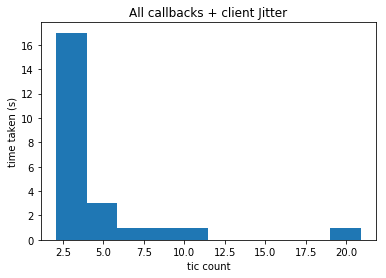

In [184]:
#plot_file('hublogs-2')
#plot_file('hublogs-cpython')
#plot_file('hublogs-no-poll')
#plot_file('hublogs/spawner-notify-hub-jitter-client-nojitter', 'Clients with no Jitter')
plot_file('/home/yuvipanda/code/datahub-acs/hub-acs/test-4k-eastus-nginx/hub-logs-bigger', 'All callbacks + client Jitter')
#plot_file('hublogs/client-jitter-500ms', 'Clients with upto 500ms Jitter')
#plot_file('hublogs-deletion')

In [172]:
def large_tics(filepath, secs=1):
    iterations = ioticks(filepath)
    large_only = [i for i in iterations if i.get('time', 0) > secs]
    return large_only

lt = large_tics("hublogs/sqlite-full-callbacks")

In [173]:
def summarize_callbacks(iteration):
    summary = {}
    for c in iteration['callbacks']:
        summary[(c['file'], c['line'])] = summary.get((c['file'], c['line']), 1) +1
    return summary

In [174]:
summaries = {}
for t in lt:
    s = summarize_callbacks(t)
    for k, v in s.items():
        summaries[k] = summaries.get(k, 0) + v
summaries

{('/srv/venv/lib/python3.5/site-packages/jupyterhub/handlers/base.py',
  '321'): 1111,
 ('/srv/venv/lib/python3.5/site-packages/jupyterhub/handlers/base.py',
  '338'): 964,
 ('/srv/venv/lib/python3.5/site-packages/jupyterhub/handlers/login.py',
  '79'): 1113,
 ('/srv/venv/lib/python3.5/site-packages/jupyterhub/proxy.py', '226'): 951,
 ('/srv/venv/lib/python3.5/site-packages/jupyterhub/user.py', '256'): 2002,
 ('/srv/venv/lib/python3.5/site-packages/jupyterhub/user.py', '405'): 8,
 ('/srv/venv/lib/python3.5/site-packages/jupyterhub/utils.py', '118'): 959,
 ('/srv/venv/lib/python3.5/site-packages/jupyterhub/utils.py', '125'): 971,
 ('/srv/venv/lib/python3.5/site-packages/jupyterhub/utils.py', '52'): 1298,
 ('/srv/venv/lib/python3.5/site-packages/kubespawner/proxy.py', '71'): 2596,
 ('/srv/venv/lib/python3.5/site-packages/kubespawner/proxy.py', '85'): 2572,
 ('/srv/venv/lib/python3.5/site-packages/kubespawner/spawner.py', '757'): 1312,
 ('/srv/venv/lib/python3.5/site-packages/kubespawner/

In [175]:
len(lt)

156